# Checkpoint 1

**Due: Tuesday, 18 October, 2022 at 11:00am BST**

Total points: 100

### Read This First
1. Use the constants provided in the cells. Do not use your own constants.

2. Wherever you see `raise NotImplementedError()`, remove that line and put your code there.

3. Put the code that produces the output for a given task in the cell indicated. You are welcome to add as many cells as you like for imports, function definitions, variables, etc.

4. Your notebook must run correctly when executed once from start to finish. Your notebook will be graded based on how it runs, not how it looks when you submit it. To test this, go to the *Kernel* menu and select *Restart & Run All*.

5. Once you are happy with it, clear the output by selecting *Restart & Clear Output* from the *Kernel* menu.

6. Submit through Noteable.

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import time

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

# Problem 1 - 20 points

## Interpolation
You are given an array of x and y measurements that you need to interpolate on new locations.

The file *ch1_1_data.txt* is a text file that contains two arrays of Xs and Ys in two rows that need to be interpolated. The file *ch1_1_test.txt* is a text file that contains an array of X values on which you need to evaluate the interpolated function.

You will need to do the interpolation by chosing the best interpolation technique among linear interpolation, cubic splines and smoothing splines with different values of smoothing parameters.

You need to write the code that

* selects the best among different interpolation methods for a provided dataset.
* returns the array of the results of evaluating the best interpolation method on the test dataset. Note, the returned array of interpolated Y values should correspond directly to the X values from the test file. That is, the first returned Y value should correspond to the first X value and so on.

The resulting array will then be verified to provide a mean square error (MSE) with respect to the true values of **MSE < 0.1**, where

$
\large
\begin{align}
MSE = \frac{1}{N} \sum_{i=1}^{N} (y_{interp, i} - y_{true, i})^2.
\end{align}
$

In [3]:
import scipy.interpolate

In [4]:
def evaluate_predictitions(x, y, s1, s2, s3):
    
    """
    This function tests the predictive abilities of the linear interpolation method, cubic splines method
    and smoothing splines method for three different smoothing parameters. This is done by splitting the
    data into 3 chunks and returning the mean square error for each of the interpolators
    """
    
    nsplit = 3 
    N = len(x)
    pos = np.arange(len(x))
    
    ret_lin = 0 
    ret_cub = 0
    ret_smo1 = 0
    ret_smo2 = 0
    ret_smo3 = 0
    
    for i in range(nsplit):
        testsubset = pos%nsplit ==i
        fitsubset = ~testsubset 
        curx = x[fitsubset]
        cury = y[fitsubset]
        testx = x[testsubset]
        testy = y[testsubset]
        
        testx_clip = np.clip(testx, x[1], x[-2])
        
        Int_lin = scipy.interpolate.interp1d(curx, cury)
        Int_cub = scipy.interpolate.CubicSpline(curx, cury)
        Int_smo1 = scipy.interpolate.UnivariateSpline(curx, cury, s=s1)
        Int_smo2 = scipy.interpolate.UnivariateSpline(curx, cury, s=s2)
        Int_smo3 = scipy.interpolate.UnivariateSpline(curx, cury, s=s3)
        
        ret_lin = ret_lin + np.mean((Int_lin(testx_clip) - testy)**2)
        ret_cub = ret_cub + np.mean((Int_cub(testx) - testy)**2)
        ret_smo1 = ret_smo1 + np.mean((Int_smo1(testx) - testy)**2)
        ret_smo2 = ret_smo2 + np.mean((Int_smo2(testx) - testy)**2)
        ret_smo3 = ret_smo3 + np.mean((Int_smo3(testx) - testy)**2)
        
    ret_lin =ret_lin/nsplit
    ret_cub =ret_cub/nsplit
    ret_smo1 =ret_smo1/nsplit
    ret_smo2 =ret_smo2/nsplit
    ret_smo3 =ret_smo3/nsplit
    
    return ret_lin, ret_cub, ret_smo1, ret_smo2, ret_smo3

In [5]:
def interpolator(ind, x, y, xeval, s1, s2, s3):
    
    """
    This function will perform the linear interpolator depending on the indice given which is dependent 
    on which mean square error gives the lowest value
    """
    
    if ind == 0:
        xevalclip = np.clip(xeval, x[1], x[-2])
        
        return (scipy.interpolate.interp1d(x,y)(xevalclip))
    
    
    if ind == 1:
        
        return (scipy.interpolate.CubicSpline(x, y)(xeval))
    
    
    if ind == 2:
        
        return (scipy.interpolate.UnivariateSpline(x, y, s=s1)(xeval))
    
    
    if ind == 3:
        
        return (scipy.interpolate.UnivariateSpline(x, y, s=s2)(xeval))
    
    
    if ind == 4:
        
        return scipy.interpolate.UnivariateSpline(x, y, s=s3)(xeval)

In [6]:
def solve_task1():
    
    """
    This function selects the best interpolation method for the provided data out of the linear interpolation method, 
    cubic splines method and smoothing splines method for three different smoothing parameters. The smoothing 
    parameters are given as s1, s2, and s3 which can be chosen arbitrarily and can be changed. Function returns 
    the numpy array of interpolated values at the locations specified in ch1_1_test.txt
    """

    #Reads the data
    Data = np.loadtxt('ch1_1_data.txt')
    x = Data[0]
    y = Data[1]
    xeval = np.loadtxt('ch1_1_test.txt')

    #Sorts the data
    ind1 = np.argsort(x)
    xsort = x[ind1]
    ysort = y[ind1]

    #sorts the interpolation locations
    ind2 = np.argsort(xeval)
    xevalsort = xeval[ind2]

    #3 chosen smoothing parameters
    s1 = 2
    s2 = 0.3
    s3 = 0.01

    #evaluates the msd and therefore most suitable interpolator 
    msd = evaluate_predictitions(xsort, ysort, s1, s2, s3)
    msd_ind = np.argmin(msd)

    #Does the interpolation
    yevalsort = interpolator(msd_ind, xsort, ysort, xevalsort, s1, s2, s3)

    #resorts the data so that Y values correspond directly to X values in test file
    unsorted_ind = np.searchsorted(xevalsort, xeval)
    yevalunsorted = yevalsort[unsorted_ind]

    
    return yevalunsorted

We will add tests to the cell below when grading.

In [7]:
# This function will be tested with this 
# assert ( np.mean((solve_task1()- YTRUE )**2) < 0.1)

print ("Testing, testing...")



Testing, testing...


# Problem 2 - 80 points

This problem is divided into 5 tasks, worth the following point values:

1. 20 points
2. 15 points
3. 15 points
4. 20 points
5. 10 points

## The 1D time-independent Schrödinger equation

In one dimension, the time-independent Schrödinger equation is given by

$
\large
\begin{align}
\mathbf{H}\ \mathbf{\Psi} = E\ \mathbf{\Psi}
\end{align}
$,

where $\mathbf{H}$ is the Hamiltonian. Here, $E$ and $\mathbf{\Psi}$ are the eigenvectors and eigenvalues of $\mathbf{H}$, respectively. The Hamiltonian is expressed as

$
\Large
\begin{align}
H = -\frac{\hbar^2}{2m} \nabla^2 + V(r),
\end{align}
$

where $V(r)$ is the electric potential energy, given by

$
\Large
\begin{align}
V(r) = -\frac{e^{2}}{4 \pi \epsilon_{0} r}.
\end{align}
$

In matrix form, the Schrödinger equation is solved for N equally spaced values of r, such that r goes from ($r_{max}$/N) to $r_{max}$, where $r_{max} \sim 1.5$ nm is a sensible choice. To turn the Schrödinger equation into a matrix, $\textbf{V(r)}$ should be a diagonal matrix with the values of the potential at each r along the diagonal.

For this problem, the constants for the above equations have been defined for you in the cell below. Please use these for your calculations.
* $\frac{\hbar^{2}}{2m} = 0.0380998\ nm^{2} eV$ (called `c1` below)
* $\frac{e^{2}}{4 \pi \epsilon_{0}} = 1.43996\ nm\ eV$ (called `c2` below)
* $r_{0} = 0.0529177\ nm$ (the Bhor radius, called `r0` below)
* Planck constant $h = 6.62606896\times10^{-34} J s$ (`h`)
* Speed of light $c = 299792458\ m/s$ (`c`)

In [8]:
# Constants (use these)
c1 = 0.0380998 # nm^2 eV
c2 = 1.43996 # nm eV
r0 = 0.0529177 # nm
h  = 6.62606896e-34 # J s
c  = 299792458. # m/s
hc = 1239.8419 # eV nm

# Task 1 - 20 points

For this task, you will create the matrix representing $\mathbf{H}$ and find the two lowest eigenvalues. These correspond to the two lowest energy levels of the Hydrogen atom.

In the constants defined above, the theoretical values for the first two energy levels are given by

$
\Large
\begin{align}
e_{n} = \frac{c_2}{2 r_0 n^2},
\end{align}
$

where $r_{0}$ is the Bhor radius, given by

$
\Large
\begin{align}
r_{0} = \frac{4 \pi \epsilon_{0} \hbar^{2}}{m e^{2}}.
\end{align}
$

In the cells below, write a function that creates a matrix representing the Hamiltonian and returns the two lowest eigenvalues. **This function should take a single argument, N, for the size of the matrix.**

Use your function to determine the minimum value of N (within a factor of 2) required to compute the two lowest energy levels to within **0.05\%** of the theoretical values. Print the values of the two energy levels and the error for each, where the error is $abs((E_{calc} - E_{theo}) / E_{theo})$. $E_{calc}$ is the calculated value and $E_{theo}$ is the theoretical value. **Note, your code should iteratively call your function while increasing N (e.g., doubling it each time) and stop when the desired error is reached. It is not sufficient to simply run the code at a single value of N that meets the criteria.**

In [9]:
from scipy import sparse
from scipy.sparse import linalg as splinalg

In [10]:
def Schrodinger(N):
    
    """
    This function solves the schrodinger equation for N equally spaced values of r by using sparse matrices
    and an eigensolving function
    """
    
    rmax = 1.5
    separation = rmax/N

    laplace_diagonals = [[np.repeat(-2, N)], [np.repeat(1, N-1)], [np.repeat(1, N-1)]]
    laplace = sparse.diags(laplace_diagonals, [0, -1, 1], shape = (N,N))/(separation**2)

    diagonal = np.linspace(separation, rmax, N)
    diagonal = 1/diagonal
    V_r = -c2*sparse.diags(diagonal, shape = (N,N))

    SEqn = -c1*laplace + V_r

    evals, evecs = splinalg.eigsh(SEqn, k = 2, which = 'SA')
    
    return evals

In [11]:
#Theoretical values of the energy levels
e1_theo = -c2/(2*r0)
e2_theo = -c2/(2*r0*4)

#Starting N value
N = 4

#Start with arbitrarily large error  
error1 = 10
error2 = 10

#While loop to stop when desired precision is reached
while error1 and error2 > 5e-4:
    
    #Calculates the first and second energy levels
    e1_calc = Schrodinger(N)[0]
    e2_calc = Schrodinger(N)[1]
    
    #calculates the errors 
    error1 = abs((e1_calc - e1_theo)/e1_theo)
    error2 = abs((e2_calc - e2_theo)/e2_theo)
    N *= 2

print ("Minimum value of N: ", N)
print("Lowest energy value: ", e1_calc, "eV and corresponding error: ", error1, "eV")
print("Second lowest energy value: ", e2_calc, "eV and corresponding error: ", error2, "eV")

Minimum value of N:  1024
Lowest energy value:  -13.595205200421239 eV and corresponding error:  0.0007680904548306994 eV
Second lowest energy value:  -3.4007519652640354 eV and corresponding error:  0.0001946038931489703 eV


## Task 2 - 15 points

Now, imagine the Coulomb law has a minor modification to it, and is now given by:

$
\Large
\begin{align}
F(r) = -\frac{e^{2}}{4 \pi \epsilon_{0} r^{2}} \left( \frac{r}{r_{0}} \right)^{\alpha},
\end{align}
$

where $\alpha = 0.01$ and $r_{0}$ is the Bhor radius, given by:

$
\Large
\begin{align}
r_{0} = \frac{4 \pi \epsilon_{0} \hbar^{2}}{m e^{2}}.
\end{align}
$

The electric potential is given by:

$
\Large
\begin{align}
V(r) = \int_{r}^{\infty} F(r^{\prime}) dr^{\prime}
\end{align}
$

Using the constants defined previously, write a function to calculate V(r) using the modified Coulomb law by numerically integrating the equation above. This function need only accept a single value of radius and not an entire array. Your function must agree with the analytical value to within $10^{-5}$ eV.

Your function should go in the cell below using the template for `potential_numerical`.

In another cell, make a plot of V(r) over the range of r values used in Task 1. Remember to label axes and show units.

In [12]:
from scipy import integrate

In [13]:
def CoulombForce(r, alpha):
    
    
    return -c2*((r/r0)**alpha)/(r**2)

In [14]:
def potential_numerical(r, alpha):
    
    """
    Calculates the potential at r using integration technique
    """
    
    Area = integrate.quad(CoulombForce, r, np.inf, args = (alpha,))
    
    
    return Area[0] 

The cell below will test your function for a few values of radius.

In [15]:
def potential_exact(r, alpha):
    return c2*np.power(r,alpha-1)*np.power(r0,-alpha) / (alpha-1)

for my_r in np.linspace(0.01, 1, 100):
    diff = abs(potential_numerical(my_r, 0.01) - potential_exact(my_r, 0.01))
    assert(diff <= 1e-5)

Plot V(r) in the cell below.

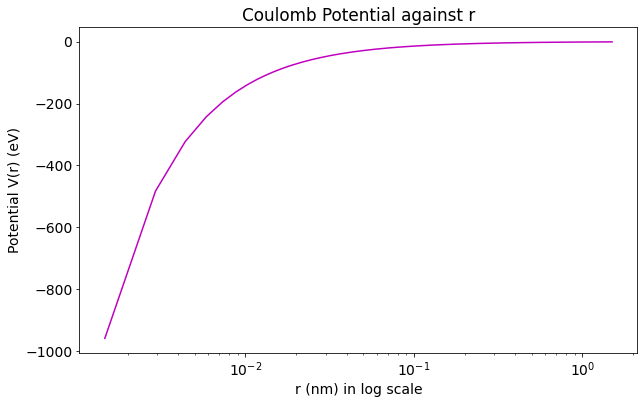

In [16]:
# Plot V(r) here!

N = 1024
rmax = 1.5
separation = rmax/N

#Iterates over r values up to rmax and finds corresponding potential
r_vals = np.linspace(separation, rmax, N)
V_r_vals = []
for my_r in np.linspace(separation, rmax, N):
    V_r = potential_numerical(my_r, 0.01)
    V_r_vals.append(V_r)

plt.plot(r_vals, V_r_vals, 'm')
plt.xlabel("r (nm) in log scale")
plt.ylabel("Potential V(r) (eV)")
plt.title("Coulomb Potential against r")
plt.xscale('log')

## Task 3 - 15 points

Write a function to calculate the first 2 energy levels (eigenvalues of $H$) for $\alpha = 0.01$ and print out the values in eV. The values must be accurate to 0.01 eV. Use the function template `calculate_energy_levels_modified` below for your function. It is fine to call functions you've already written. 

In the cell after, plot the difference $\Delta E$ between the two lowest energy levels as a function of $\alpha$ for $\alpha = 0$ and $0.01$. Remember axes labels and units.

In [17]:
def calculate_energy_levels_modified(N, alpha):
    
    """
    Solves the schrodinger equation but now uses integration method to estimate the coulomb potential values
    at a given value of alpha. Similarly uses sparse matrices and eigenvalue solver
    """
    
    rmax = 1.5
    separation = rmax/N

    laplace_diagonals = [[np.repeat(-2, N)], [np.repeat(1, N-1)], [np.repeat(1, N-1)]]
    laplace = sparse.diags(laplace_diagonals, [0, -1, 1], shape = (N,N))/(separation**2)

    diagonal = np.linspace(separation, rmax, N)

    for r in diagonal:
        V_r = potential_numerical(r, alpha)
        index = np.where(diagonal == r)
        diagonal[index] = V_r

    V_r_m = sparse.diags(diagonal, shape = (N,N))

    SEqn = -c1*laplace + V_r_m

    evals, evecs = splinalg.eigsh(SEqn, k = 2, which = 'SA')
    
    return evals


The cell below will test your function against the correct values.

In [18]:
N = 1024
alpha = 0.01
E1, E2 = calculate_energy_levels_modified(N, alpha)

In [19]:
print ("For alpha = 0.01")
print ("The lowest energy level is: ", E1, "eV")
print ("The second lowest energy level is: ", E2, "eV")

For alpha = 0.01
The lowest energy level is:  -13.805103845838696 eV
The second lowest energy level is:  -3.5344766180655482 eV


In the cell below, make the plot of $\Delta E$ vs. $\alpha$ as instructed above.

Text(0.5, 1.0, 'Energy separation between lowest and second lowest levels')

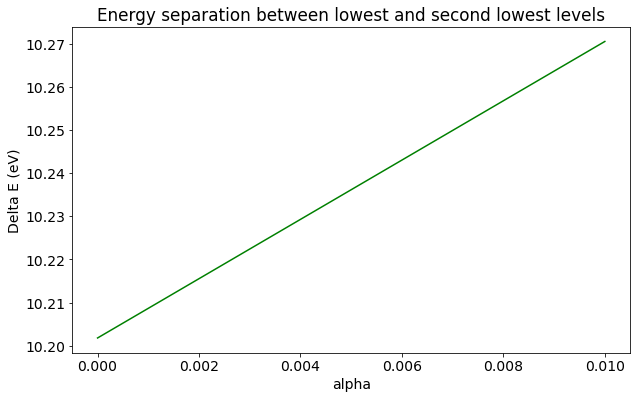

In [20]:
# YOUR CODE HERE

N = 1024

alpha_vals = np.array([0, 0.01])
Delta_E = []

#Performs method for alpha = 0, and alpha = 0.01
for alpha in alpha_vals:
    E1, E2 = calculate_energy_levels_modified(N, alpha)
    Delta_E.append(E2 - E1)

plt.plot(alpha_vals, Delta_E, 'g')
plt.xlabel("alpha")
plt.ylabel("Delta E (eV)")
plt.title("Energy separation between lowest and second lowest levels")

## Task 4 - 20 points

The transition between the 1st and 2nd states is known as the Lyman-$\alpha$ transition. The photon emitted by this transition will have a wavelength, $\lambda$, given by

$
\Large
\begin{align}
\lambda = \frac{hc}{\Delta E}.
\end{align}
$

Imagine the wavelength of this transition has been measured as $\lambda = 121.5 \pm 0.1$ nm. What is the maximum value of $\alpha > 0$ consistent with this measurement (i.e., the largest $\alpha$ such that the predicted and measured wavelengths differ by less than 0.1 nm)?

Using the template `find_alpha_max`, write a function that performs the above computation and returns the value of $\alpha_{max}$. Your value for $\alpha_{max}$ should be within 1% of the correct answer.

In [21]:
import scipy.optimize as opt

In [22]:
def func(alpha):
    
    """
    Function to be put into brents method. This takes in alpha and performs the entire integration
    method and solves the schrodinger equation with the specific value of alpha
    """
    
    E1, E2 = calculate_energy_levels_modified(1024, alpha)
    D_E = E2 - E1
    
    
    return hc/D_E - 121.4
    
    

In [23]:
def find_alpha_max():

    """
    Finds the root using Brents method 
    """
    
    alpha_max = opt.brentq(func, 0, 0.01)
    
    
    return alpha_max

The cell below will run your function. You will not be told the correct answer.

In [24]:
amax = find_alpha_max()
print (f"alpha_max = {amax}.")

alpha_max = 0.0016279327199646514.


## Task 5 - 10 points

Knowing the shape of the matrix for of $\textbf{H}$, is it possible to greatly increase the accuracy of the energy level calculation without a significant increase in computation time? In the cell below, write a function to compute the first two energy levels using the original (unmodified) potential. Your function should run in 15 seconds or less and compute the first two energy levels each to within an accuracy of $5\times10^{-6}$.

In [25]:
def calculate_energy_levels_super():
    
    """
    Solves the schrodinger equation and finds the eigenvalues similar to previous task. This time eigsh function uses 
    shift-invert mode and finds just the two closest eigenvalues near sigma = -14 
    """
    
    N = 32384
    rmax = 1.5
    separation = rmax/N

    laplace_diagonals = [[np.repeat(-2, N)], [np.repeat(1, N-1)], [np.repeat(1, N-1)]]
    laplace = sparse.diags(laplace_diagonals, [0, -1, 1], shape = (N,N))/(separation**2)

    diagonal = np.linspace(separation, rmax, N)
    diagonal = 1/diagonal
    V_r = -c2*sparse.diags(diagonal, shape = (N,N))

    SEqn = -c1*laplace + V_r

    evals, evecs = splinalg.eigsh(SEqn, k = 2, sigma = -14, which = 'LA')
    
    return evals

In [26]:
t1 = time.time()
my_e1, my_e2 = calculate_energy_levels_super()
t2 = time.time()
print (f"Calculation took {t2-t1} seconds.")

e1_th = -c2 / (2 * r0)
e2_th = e1_th / 4

er1 = abs((my_e1 - e1_th) / e1_th)
er2 = abs((my_e2 - e2_th) / e2_th)
print (f"Err1 = {er1}, Err2 = {er2}.")

Calculation took 0.3992326259613037 seconds.
Err1 = 3.193027054660152e-06, Err2 = 3.164690940770083e-06.
